# *Deep Learning on LandCover.ai dataset*


# Short Description <a name="description"></a>

Our project involves the semantic segmentation of high-resolution aerial images to annotate various land uses. We aim to provide a quick and effective solution to this task using deep learning techniques and exploiting the features of the aerial images. Thanks to recent advancements in computational resources and sophisticated algorithms, we can now achieve efficient land coverage annotation in a matter of minutes or seconds. This is in contrast to previous years where manual feature extractors and rules were required. Neural networks, particularly CNNs, have enabled the development of automatic procedures, with the focus now on creating efficient architectures that can deliver fast and precise results. 

For this purpose, we develop different architectures in order to find the best model for detecting 5 land uses: 1) buildings, 2) woodlands, 3) water 4) roads and 5) background. The dataset that we use in this lab is the [LandCover.ai](#https://landcover.ai.linuxpolska.com) which can be found also in Kaggle through this [link](#https://www.kaggle.com/datasets/adrianboguszewski/landcoverai). The challenge when working with high resolution images is that in order to capture as many as possible instances from each land area you need to work with larger images (with respect to height and width). This fact makes harder to train deep learning models since the computational resources required rise quickly. 

# 1. Data description & preparation <a name="1"></a>

## 1.1 Data Visualizations <a name="1.1"></a>

The dataset that we utilize in this notebook is the LandCover.ai as presented in [[1]](#ref1). The dataset consists of 41 orthophoto tiles from different counties located in Poland. Every tile has about 5 km$^2$. There are 33 images with resolution 25 cm (ca. 9000 x 9500 px) and 8 images with resolution 50 cm (ca. 4200 x 4700 px), which gives 176.76 km$^2$ and 39.51 km$^2$ respectively resutling in 216.27 km$^2$ coverage in total. Below you can see some samples from the dataset.

In [1]:
import cv2
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

DATA_ROOT = "../input/landcoverai"

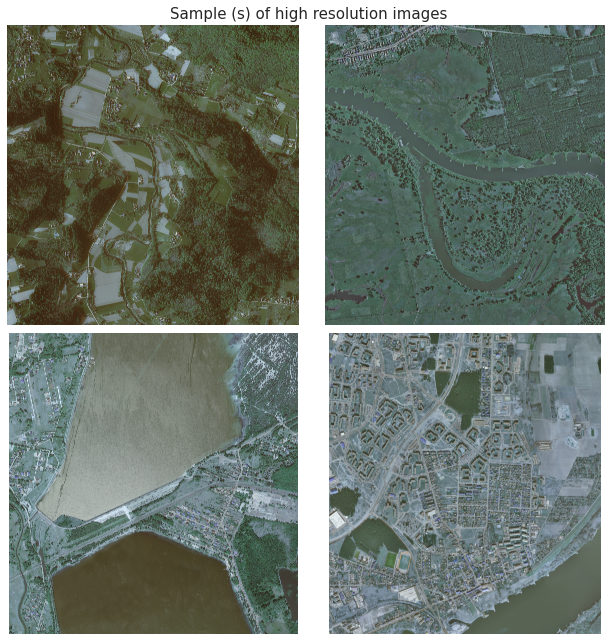

In [2]:
images_list = list(glob.glob(os.path.join(DATA_ROOT, "images", "*.tif")))
samples = [0,1,2,3]
fig, ax = plt.subplots(figsize = (9,9), nrows = 2, ncols =2)
for i, sample in enumerate(samples):
    r,c = divmod(i,2)
    ax[r,c].imshow(cv2.imread(images_list[sample])/255)
    ax[r,c].axis("off")
plt.suptitle("Sample (s) of high resolution images", fontsize = 15)
plt.tight_layout(pad=0.8)
plt.savefig("Samples.png")
plt.show()

The annotations of the dataset have been manually created with the VGG Image Annotator (VIA) [[2]](#ref2). The creators of the dataset provide the corresponding masks for the images. There are 5 classes in total:

<h4><center>The different land uses of the dataset</center></h4>

| **Class** | **Coverage (km$^2$)** | **Label** |
|:---------------|:-----------------|:-----------------|
| **Background** |       **125.75**     |       **0**     |
| **Building** |       **1.85**     |       **1**     |
| **Woodland** |       **72.02**     |       **2**     |
| **Water** |       **13.15**     |       **3**     |
| **Road** |       **3.5**     |       **4**     |

To maintain the readability of this notebook, we have created a utility script called utils.py. This script contains all the necessary functions and classes that we will use throughout this notebook. By utilizing the custom function visualize_tif, we can generate an RGB image with the corresponding masks. We have used the same color map as the creators of this dataset to visualize the 5 different land uses; buildings are represented as dark gray, woodlands as middle gray, water as light gray, roads as white, and black pixels correspond to other land uses (background).

In [3]:
"""from utils import visualize_tif

visualize_tif(h = 8, w = 8, index = 2,
             save_title = "VisualizeTif") # Index = n corresponds to the n-th tif file in order located in "images" file"""

'from utils import visualize_tif\n\nvisualize_tif(h = 8, w = 8, index = 2,\n             save_title = "VisualizeTif") # Index = n corresponds to the n-th tif file in order located in "images" file'

## 1.2 Image Cropping <a name="1.2"></a>

The images in their original size, which are around 9000 x 9000, are too large to be used for training a deep neural network due to the limited availability of GPU resources. As a result, the authors in [[1]](#ref1) have divided the images and their corresponding masks into 512 x 512 tiles and split them into training, validation, and test sets at 70%, 15%, and 15% respectively. They also provide a list of filenames for all the datasets, enabling users to test their models on the same sets and compare their results with the benchmark results.

To streamline the splitting process, we have created a custom function called split_images. The function takes in only one argument which is the desired size of the resulting squared images (default is set to 512). We have utilized this function to split the images and save the results in a folder called "output".

### 1.2.1 Squared images of size 512 <a name="1.2.1"></a>

In this section, we have divided the images into smaller ones with a size of 512x512. Additionally, we have provided some statistical information regarding the resulting dataset. To visualize the obtained dataset, we have used a custom function called visualize_dataset, and some samples can be seen below.

In [4]:
# Splitting the images
from utils import split_images

IMAGE_SIZE = 512
split_images(TARGET_SIZE = IMAGE_SIZE)

Splitting the images...

Processed M-33-20-D-c-4-2 1/41
Processed M-33-20-D-d-3-3 2/41
Processed M-33-32-B-b-4-4 3/41
Processed M-33-48-A-c-4-4 4/41
Processed M-33-7-A-d-2-3 5/41
Processed M-33-7-A-d-3-2 6/41
Processed M-34-32-B-a-4-3 7/41
Processed M-34-32-B-b-1-3 8/41
Processed M-34-5-D-d-4-2 9/41
Processed M-34-51-C-b-2-1 10/41
Processed M-34-51-C-d-4-1 11/41
Processed M-34-55-B-b-4-1 12/41
Processed M-34-56-A-b-1-4 13/41
Processed M-34-6-A-d-2-2 14/41
Processed M-34-65-D-a-4-4 15/41
Processed M-34-65-D-c-4-2 16/41
Processed M-34-65-D-d-4-1 17/41
Processed M-34-68-B-a-1-3 18/41
Processed M-34-77-B-c-2-3 19/41
Processed N-33-104-A-c-1-1 20/41
Processed N-33-119-C-c-3-3 21/41
Processed N-33-130-A-d-3-3 22/41
Processed N-33-130-A-d-4-4 23/41
Processed N-33-139-C-d-2-2 24/41
Processed N-33-139-C-d-2-4 25/41
Processed N-33-139-D-c-1-3 26/41
Processed N-33-60-D-c-4-2 27/41
Processed N-33-60-D-d-1-2 28/41
Processed N-33-96-D-d-1-1 29/41
Processed N-34-106-A-b-3-4 30/41
Processed N-34-106-A

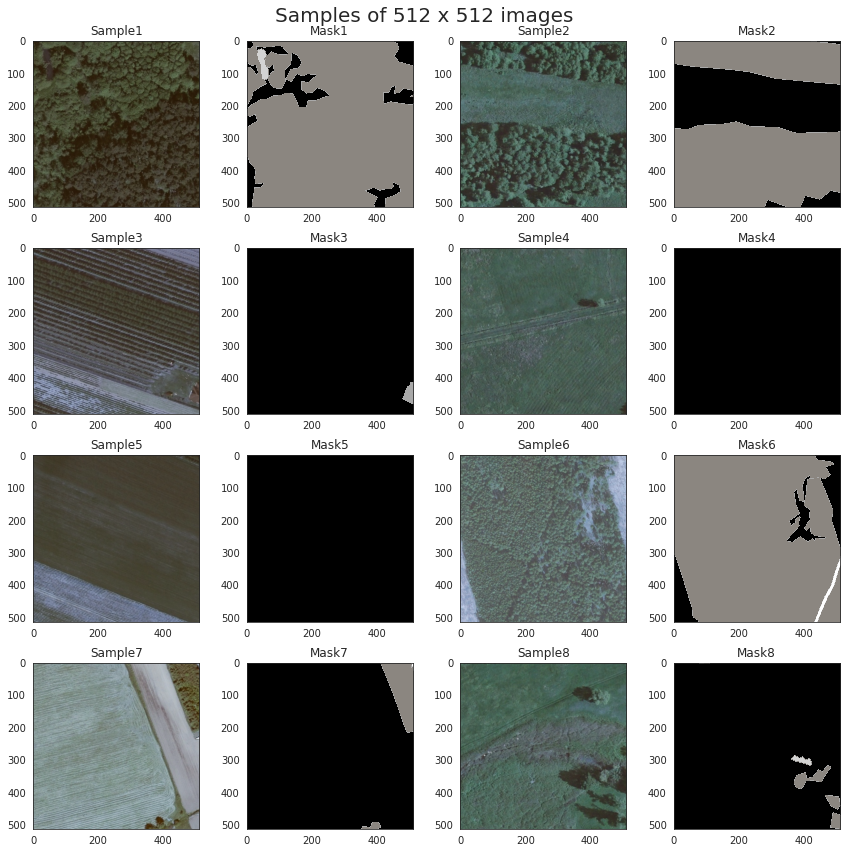

In [7]:
from utils import visualize_dataset

visualize_dataset(num_samples = 8, w = 12, h = 12, pad = 1.4,
                 save_title = "Visualize_dataset", indices = [0,1,17,20,29,5,6,7])

Due to the fact that background and woodland cover a large portion of the dataset, with 125 km$^2$ and 72 km$^2$ respectively, the dataset is highly unbalanced. This presents a significant challenge in developing a model that can accurately recognize the other areas, particularly the pixels corresponding to roads and buildings which are the most difficult to classify. To address this issue, we have implemented several mechanisms such as adjusting the model's architecture, optimizing the loss function, and applying appropriate regularization during the training process.

To determine the distribution of the training set, we have constructed a custom class called SegmentationDataset. This class is used for training and validating the models in the upcoming sections and inherits from nn.Module. It takes in several arguments including mode, which specifies the text file to be read (either "train.txt", "val.txt", or "test.txt"), ratio, which represents the total ratio of the given dataset to be used (e.g. if mode is "train" and ratio is 0.5, then 50% of the entire training set will be used), and transforms, which corresponds to the transformations used to augment the training set for better performance. The pixel distribution for each class in the training set for 512 x 512 images can be found below.

In [8]:
import torch
from torch.utils.data import DataLoader
from utils import SegmentationDataset

device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
train_set = SegmentationDataset(mode = "train")
train_dloader = DataLoader(train_set,batch_size = 8,num_workers =2)

class_dist = {"background":0, "building":0,
                     "woodland":0, "water":0, "road":0}
label_mapping = {0: "background", 1: "building",
                2: "woodland", 3: "water", 4: "road"}

for img,mask in train_dloader:
    for class_label in label_mapping.keys():
        class_dist[label_mapping[class_label]] += mask[mask == class_label].numpy().size

Using the whole train set --> 7470


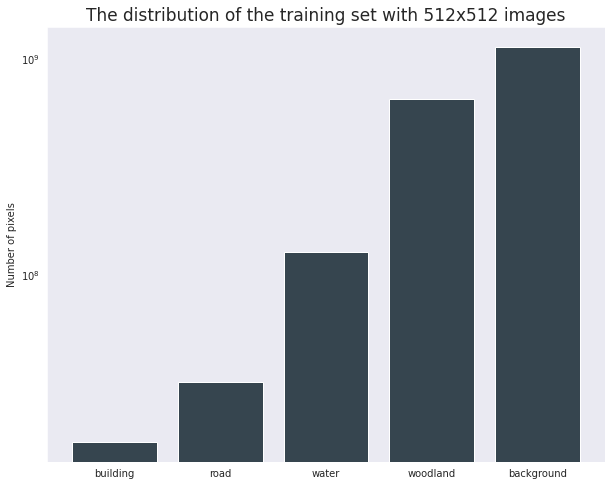

In [10]:
temp_list = sorted([(l,s) for (l,s) in class_dist.items()], key= lambda x: x[1])
labels = [x[0] for x in temp_list]
support = [x[1] for x in temp_list]

sns.set_style("dark")
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(labels, support, color = "#36454F")
ax.set_yscale("log")
ax.set_title("The distribution of the training set with 512x512 images",
            fontsize = 17)
ax.set_ylabel("Number of pixels")
plt.savefig("Barplt.png")
plt.show()

## 1.2 Data Augmentation <a name="1.2"></a>

One common technique for improving a model's predictive power, while mitigating overfitting and class imbalances in the dataset, is to use data augmentations. In this notebook, we will be using the [Albumentations](https://albumentations.ai) library to enhance our training set by applying a series of transformations. The idea behind data augmentation in this case is to simulate images captured under different flight and land cover conditions, and at different times of the year. The transformations are defined by the transforms argument in the SegmentationDataset class located in the utils.py script. Below, you can see the data augmentations that we will use for the largest training set, which corresponds to 512x512 images.

In [12]:
import albumentations as A

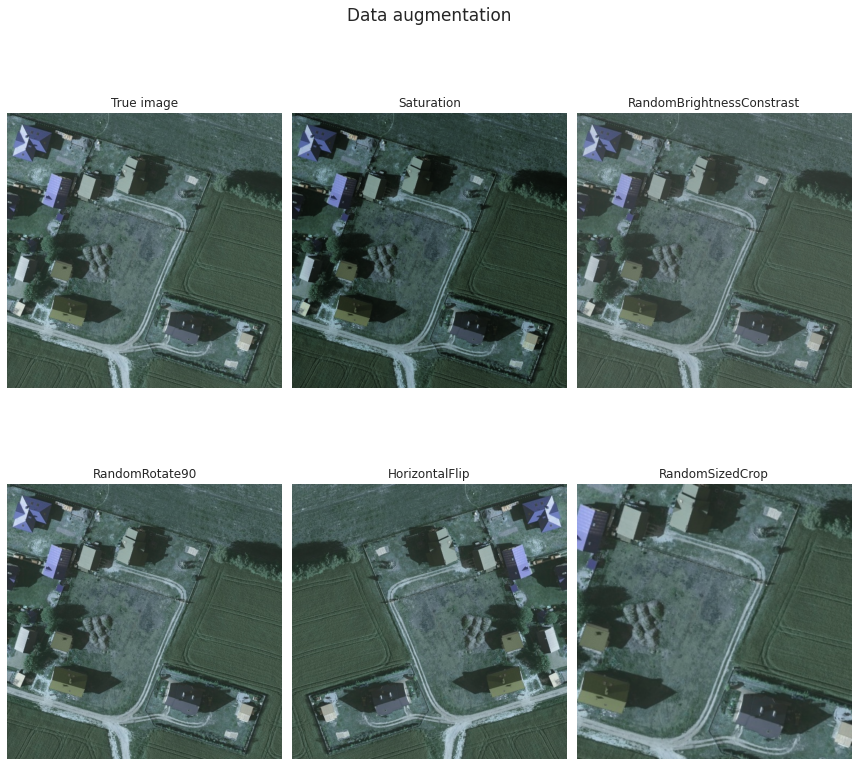

In [13]:
# Transformations
transforms = [A.HueSaturationValue(40,40,30,p=1),
             A.RandomBrightnessContrast(p=1,brightness_limit = 0.2, contrast_limit = 0.5),
             A.RandomRotate90(p=1), A.HorizontalFlip(p=1), 
              A.RandomSizedCrop(min_max_height=(248,512),height=512,width=512, p =1)]
transforms_names = ["Saturation", "RandomBrightnessConstrast",
                   "RandomRotate90", "HorizontalFlip", "RandomSizedCrop"]

# Read the NUM_SAMPLE sample in the training set
NUM_SAMPLE = 4
trainpath_list = list(glob.glob(os.path.join(os.getcwd(),"output", "*.jpg")))
img = cv2.imread(trainpath_list[NUM_SAMPLE])

fig, ax = plt.subplots(figsize = (12,12), nrows = 2, ncols = 3)

ax[0,0].imshow(img)
ax[0,0].axis("off")
ax[0,0].set_title("True image")
count = 0

for i in range(2):
    for j in range(3):
        if i+j == 0:
            ax[i,j].imshow(img)
            ax[i,j].axis("off")
            ax[i,j].set_title("True image")
        else:
            transformed_img = transforms[count](image = img)["image"]
            ax[i,j].imshow(transformed_img)
            ax[i,j].axis("off")
            ax[i,j].set_title(transforms_names[count])
            count+=1
plt.suptitle("Data augmentation", fontsize = 17)
plt.tight_layout(pad = 1)
plt.savefig("augmentations.png")
plt.show()

# 3. Experiments <a name="3"></a>

## 3.1 Setting the training scheme <a name="3.1"></a>

In this subsection we define the training scheme that we will use throughout this Notebook. The hyperparameters were chosen after experiments which were conducted locally. By no means, the chosen hyperparameters are not the optimal ones since we couldn't perform many experiments due to the GPU limitations. To validate our models we use the Intersection over Union (IoU) metric which is defined as follows: An image mask $y$ can be represented as a 2D array of size $H\times W$. Similarly, on semantic segmentation, we can represent the prediction mask as a 2D array of size $H\times W$. Suppose that $C$ is the number of classes indexed from the set $\{0,1,\dots C-1\}$. Fix an index $0\leq k \leq C-1$. Then, the number of pixels on mask $y$ which is equal to $k$ can be described by the cardinal number of the set $\{(i,j):\, 1\leq i \leq H,\, 1\leq j \leq W,\, y[i,j]=k\}$, i.e.

$$\tag{3.1.1}Y_k:=\bigl|\left\{(i,j):\, 1\leq i \leq H,\, 1\leq j \leq W,\, y[i,j]=k\right\}\bigr|.$$

Similarly, for the prediction mask $y'$ the number of pixels which is equal to $k$ is given by

$$\tag{3.1.2}Y'_k:= \bigl|\left\{(i,j):\, 1\leq i \leq H,\, 1\leq j \leq W,\, y'[i,j]=k\right\}\bigr|.$$

With this notation the intersection over union for the class $k$ on the image with mask $y$ is calculated as

$$\tag{3.1.3} \frac{\bigl|Y_k \cap Y'_k\bigr|}{\bigl|Y_k \cup Y'_k\bigr|},$$

where again by $|A|$ we denote the cardinal number of the set $A$. Observe that the quantity in (3.1.3) is always between $0$ and $1$. Values close to $0$ correspond to zero numerator. In other words, the intersection $|Y_k\cap Y'_k|$ is close to $0$ which means that there are only a few correct predictions. On the other hand, values close to $1$ means that $|Y_k\cap Y'_k| \approx |Y_k \cup Y'_k|$ which in turn implies that almost all predictions are correct. Now, given a finite sequence of images, masks and predictions we denote by $M_k$ the mean value of (3.1.3) for each $0\leq k \leq C-1$ over all masks and predictions of the sequence. Then, the Mean Intersection over Union is given by

$$\tag{3.1.4} IoU = \frac{1}{C}\sum_{k=0}^{C-1}M_{k}.$$

Now, the IoU loss (or Jaccard loss) is calculated by

$$\tag{3.1.5} IoU Loss = 1 - IoU = 1 - \frac{1}{C}\sum_{k=0}^{C-1}M_{k}.$$

Since IoU is the standard metric used for validation on semantic segmentation tasks we use the IoU loss as a loss function to train our models. We use the implementation of Jaccard loss provided by [Segmentation Models Pytorch](https://github.com/qubvel/segmentation_models.pytorch). In this Notebook we will also use some architectures provided by segmentation models PyTorch library. Below we define all the necessary hyperparameters for training and we import the `training_loop` from utils library. Furthermore, we define the series of transformations that we will use in the upcoming training sessions.

In [14]:
# Configuring the set of transformations
transforms = A.Compose([
    A.OneOf([
        A.HueSaturationValue(40,40,30,p=1),
        A.RandomBrightnessContrast(p=1,brightness_limit = 0.2,
                                  contrast_limit = 0.5)], p = 0.5),
    A.OneOf([
        A.RandomRotate90(p=1),
        A.HorizontalFlip(p=1),
        A.RandomSizedCrop(min_max_height=(248,512),height=512,width=512, p =1)
    ], p = 0.5)])

In [15]:
!pip install segmentation-models-pytorch

import segmentation_models_pytorch as smp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=8be4801d86c4b1b62a6353baaddcdef3e9f183d79ab27805c714a943b1265f33
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=53cb91379f3cd7066e8e43e884c812882ce30dc7f9c31cb664efffb28ae10d82
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels


In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
target_names = np.array(["background", "building", "woodland", "water", "road"])

# Loss function - Mean IoU loss
loss_fn = smp.losses.JaccardLoss(mode = "multiclass",
                                classes = 5).to(device)

# Hyperparameters
batch_size = 8
epochs = 80
lr = 5e-5

# Preparing datasets and DataLoaders
train_set = SegmentationDataset(mode = "train", transforms = transforms,
                               ratio = 0.6)
test_set = SegmentationDataset(mode = "test")
val_set = SegmentationDataset(mode = "val", ratio = 0.7)

train_dloader = DataLoader(train_set, batch_size = batch_size,
                           shuffle = True, num_workers = 2)
test_dloader = DataLoader(test_set, batch_size = batch_size, num_workers = 2)
val_dloader = DataLoader(val_set, batch_size=batch_size, num_workers = 2)

Using the 60.00% of the initial train set --> 4482|7470
Using the whole test set --> 1602
Using the 70.00% of the initial val set --> 1121|1602


In [17]:
from utils import training_loop

## 3.2 Vanilla UNet <a name="3.2"></a>


<br><br><br><br>

<img src="https://github.com/ChrisNick92/Geospatial-Data/blob/main/Lab6/Images/u-net-architecture.png?raw=true" width ="800" height = "600">
<br><br>

The only difference from the architecture presented in the original paper is that we use BarchNorm in every conv block and we do not change the size of the during the operations of a conv block.

In [18]:
from utils import UNet

model = UNet(in_channels = 3, out_channels = 5).to(device)

Training of Vanilla UNet starts!
Using loss as stopping criterion.

Epoch: 1/80     Training Loss: 0.6967     Validation Loss: 0.6628
Validation loss decreased (inf --> 0.662850).  Saving model ...
Epoch: 2/80     Training Loss: 0.6301     Validation Loss: 0.6004
Validation loss decreased (0.662850 --> 0.600365).  Saving model ...
Epoch: 3/80     Training Loss: 0.5874     Validation Loss: 0.5526
Validation loss decreased (0.600365 --> 0.552626).  Saving model ...
Epoch: 4/80     Training Loss: 0.5399     Validation Loss: 0.4870
Validation loss decreased (0.552626 --> 0.487041).  Saving model ...
Epoch: 5/80     Training Loss: 0.5039     Validation Loss: 0.4484
Validation loss decreased (0.487041 --> 0.448413).  Saving model ...
Epoch: 6/80     Training Loss: 0.4783     Validation Loss: 0.4522
EarlyStopping counter: 1 out of 4
Epoch: 7/80     Training Loss: 0.4495     Validation Loss: 0.4134
Validation loss decreased (0.448413 --> 0.413400).  Saving model ...
Epoch: 8/80     Training Lo

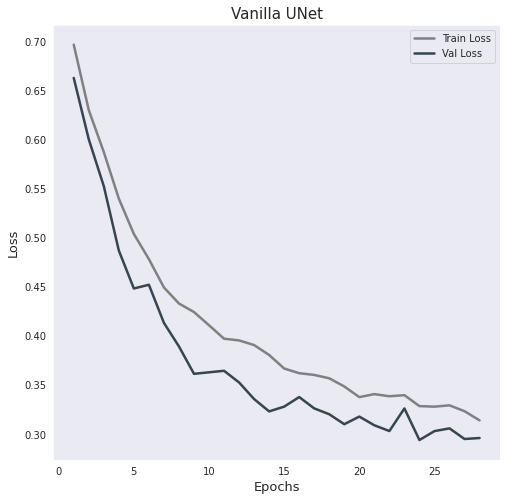


 Training completed in 4.0 h 39.0 m 6.42 s.


In [19]:
# Training starts!
training_loop(model, train_dloader, val_dloader, epochs, lr, loss_fn, mod_epochs =1,
             regularization = "L2", reg_lambda = 1e-6, early_stopping = True,
             patience = 4, verbose = True, model_title = "Vanilla UNet", save = True,
             stopping_criterion = "loss")

We assess the model's performance on the test set by utilizing a function called segmentation_test_loop. The evaluation results on the test set are presented in terms of accuracy and the average Intersection over Union (IoU). The variable `class_probs` shown below corresponds to the average probability for predicting the class $k$ for each $0\leq k \leq C-1$.

In [20]:
from utils import segmentation_test_loop
from utils import class_report

# Evaluation - Accuracy + MIoU
scores, acc, jaccard, class_probs = segmentation_test_loop(model = model, test_loader = test_dloader,
                                        device = device)

class_report(target_names, scores, acc, jaccard, class_probs)

          precision          recall          f1-score          support

background          0.95          0.90          0.93          239926712
building          0.81          0.78          0.79          3956554
woodland          0.87          0.96          0.91          144170112
water          0.85          0.88          0.87          24388122
road          0.82          0.53          0.64          7513188

- Total accuracy:0.9131

- Mean IoU: 0.7194

- Class probs
background:0.998
building:0.991
woodland:0.998
water:0.996
road:0.989


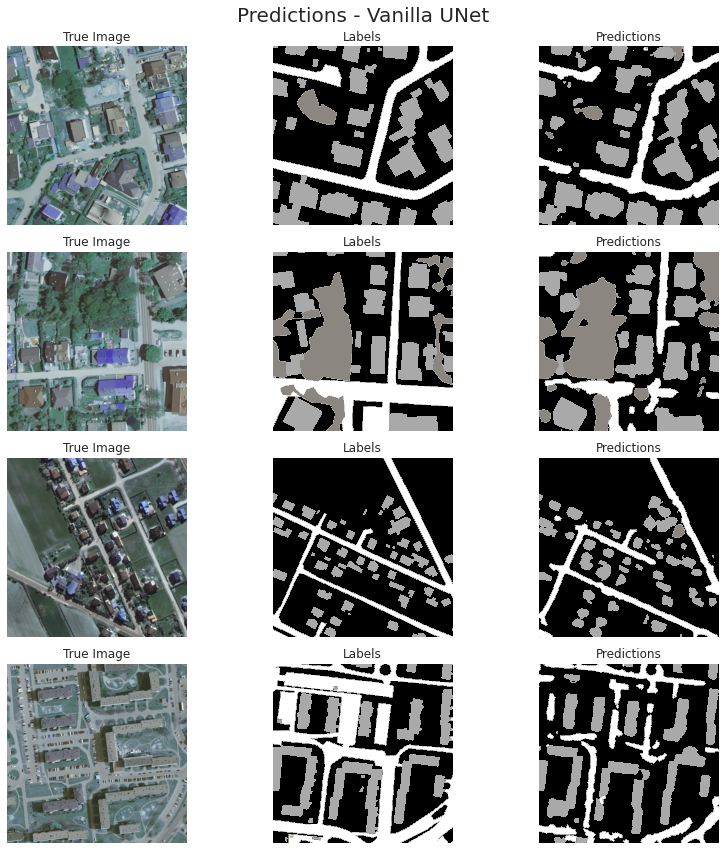

In [21]:
from utils import visualize_preds

visualize_preds(model, test_set, title = "Predictions - Vanilla UNet",
               save_title = "UNet", h = 12, w = 12, indices = [957,961,1476,1578])

## 3.3 UNet with Resnet encoder <a name="3.3"></a>

In this section we make use of transfer learning. We use a resnet model pretrained on imagenet for the encoder part of the UNet. The implemenation is taken by [segmentation models pytorch](https://github.com/qubvel/segmentation_models.pytorch).



In [22]:
model = smp.Unet(encoder_name = "resnet50",
                encoder_weights = "imagenet",
                classes = 5).to(device)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Training of UNet with Resnet encoder starts!
Using loss as stopping criterion.

Epoch: 1/80     Training Loss: 0.5436     Validation Loss: 0.3822
Validation loss decreased (inf --> 0.382202).  Saving model ...
Epoch: 2/80     Training Loss: 0.3721     Validation Loss: 0.3011
Validation loss decreased (0.382202 --> 0.301058).  Saving model ...
Epoch: 3/80     Training Loss: 0.3267     Validation Loss: 0.2802
Validation loss decreased (0.301058 --> 0.280155).  Saving model ...
Epoch: 4/80     Training Loss: 0.3010     Validation Loss: 0.2738
Validation loss decreased (0.280155 --> 0.273816).  Saving model ...
Epoch: 5/80     Training Loss: 0.2869     Validation Loss: 0.2640
Validation loss decreased (0.273816 --> 0.264009).  Saving model ...
Epoch: 6/80     Training Loss: 0.2658     Validation Loss: 0.2493
Validation loss decreased (0.264009 --> 0.249334).  Saving model ...
Epoch: 7/80     Training Loss: 0.2653     Validation Loss: 0.2400
Validation loss decreased (0.249334 --> 0.239987)

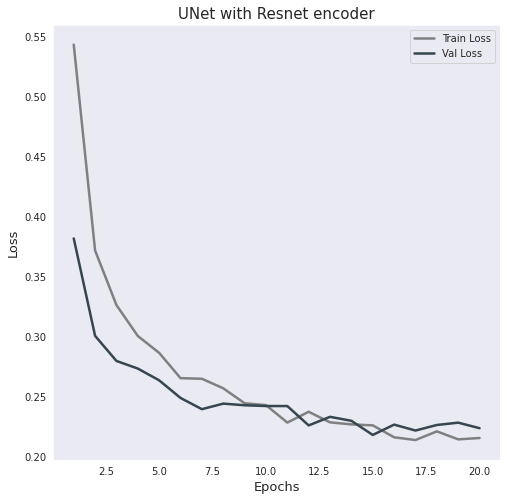


 Training completed in 1.0 h 37.0 m 36.78 s.


In [23]:
# Training starts!
training_loop(model, train_dloader, val_dloader, epochs, lr, loss_fn, mod_epochs =1,
             regularization = "L2", reg_lambda = 1e-6, early_stopping = True,
             patience = 5, verbose = True, model_title = "UNet with Resnet encoder", save = True,
             stopping_criterion = "loss")

In [24]:
# Evaluation - Accuracy + MIoU
scores, acc, jaccard, class_probs = segmentation_test_loop(model = model, test_loader = test_dloader,
                                        device = device)

class_report(target_names, scores, acc, jaccard, class_probs)

          precision          recall          f1-score          support

background          0.96          0.94          0.95          239926712
building          0.87          0.84          0.86          3956554
woodland          0.92          0.96          0.94          144170112
water          0.94          0.94          0.94          24388122
road          0.80          0.73          0.76          7513188

- Total accuracy:0.9437

- Mean IoU: 0.8100

- Class probs
background:0.999
building:0.990
woodland:0.998
water:0.998
road:0.991


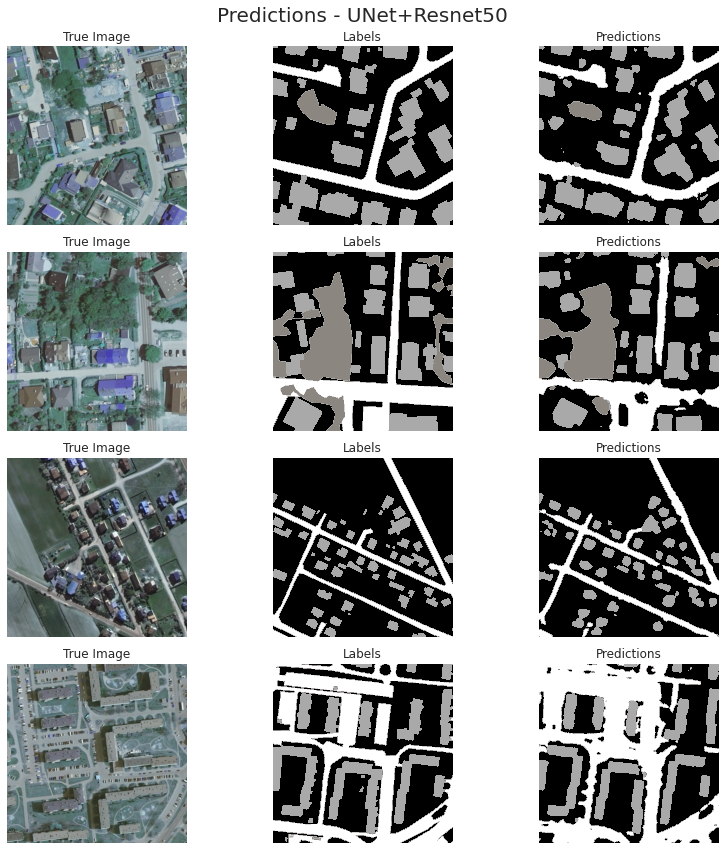

In [25]:
visualize_preds(model, test_set, title = "Predictions - UNet+Resnet50",
               save_title = "UNet+Resnet", h = 12, w = 12, indices = [957,961,1476,1578])

## 3.4 DeepLabV3+ with Resnet encoder <a name="3.3"></a>

Now we try the state-of-the-art architecture on semantic segmentation - DeepLabV3+ [[3]](#ref3). Below you can see a visual representation of the architecture. 

<img src="https://github.com/ChrisNick92/Geospatial-Data/blob/main/Lab6/Images/deeplab.png?raw=true" width ="800" height = "600">
<br><br>

The atrous conv is the main operation of the model. It uses dilated convolution to capture the contextual information at multiple scales and it is really effective for high resolution images.

In [26]:
model = smp.DeepLabV3Plus(encoder_name = "resnet50",
                         encoder_weights = "imagenet",
                         decoder_atrous_rates = (12,18,24),
                         encoder_output_stride =16,
                         classes = 5).to(device)

Training of DeepLabV3+ with Resnet encoder starts!
Using loss as stopping criterion.

Epoch: 1/80     Training Loss: 0.5107     Validation Loss: 0.3652
Validation loss decreased (inf --> 0.365216).  Saving model ...
Epoch: 2/80     Training Loss: 0.3606     Validation Loss: 0.3042
Validation loss decreased (0.365216 --> 0.304198).  Saving model ...
Epoch: 3/80     Training Loss: 0.3239     Validation Loss: 0.2822
Validation loss decreased (0.304198 --> 0.282246).  Saving model ...
Epoch: 4/80     Training Loss: 0.3000     Validation Loss: 0.2720
Validation loss decreased (0.282246 --> 0.271957).  Saving model ...
Epoch: 5/80     Training Loss: 0.2788     Validation Loss: 0.2571
Validation loss decreased (0.271957 --> 0.257109).  Saving model ...
Epoch: 6/80     Training Loss: 0.2715     Validation Loss: 0.2503
Validation loss decreased (0.257109 --> 0.250283).  Saving model ...
Epoch: 7/80     Training Loss: 0.2560     Validation Loss: 0.2662
EarlyStopping counter: 1 out of 5
Epoch: 8/

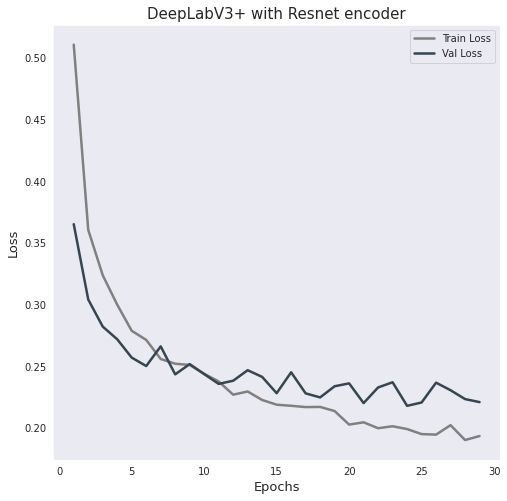


 Training completed in 2.0 h 16.0 m 7.20 s.


In [27]:
# Training starts!
training_loop(model, train_dloader, val_dloader, epochs, lr, loss_fn, mod_epochs =1,
             regularization = "L2", reg_lambda = 1e-6, early_stopping = True,
             patience = 5, verbose = True, model_title = "DeepLabV3+ with Resnet encoder", save = True,
             stopping_criterion = "loss")

In [28]:
# Evaluation - Accuracy + MIoU
scores, acc, jaccard, class_probs = segmentation_test_loop(model = model, test_loader = test_dloader,
                                        device = device)

class_report(target_names, scores, acc, jaccard, class_probs)

          precision          recall          f1-score          support

background          0.95          0.96          0.96          239926712
building          0.87          0.84          0.85          3956554
woodland          0.94          0.94          0.94          144170112
water          0.97          0.95          0.96          24388122
road          0.79          0.73          0.76          7513188

- Total accuracy:0.9477

- Mean IoU: 0.8184

- Class probs
background:0.996
building:0.983
woodland:0.995
water:0.996
road:0.977


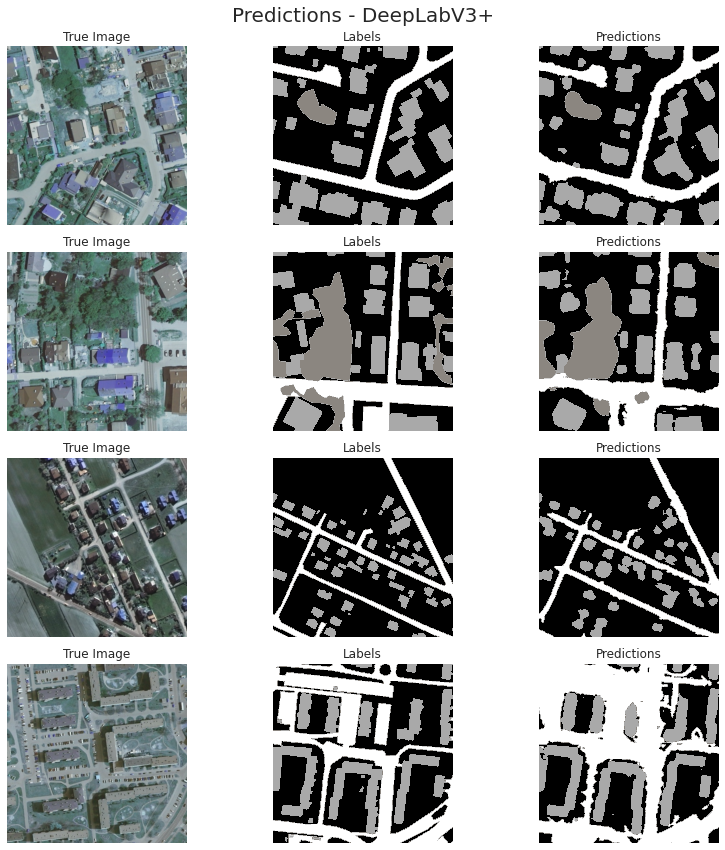

In [29]:
visualize_preds(model, test_set, title = "Predictions - DeepLabV3+",
               save_title = "DeepLabV3+", h = 12, w = 12, indices = [957,961,1476,1578])

In [30]:
# Delete the output folder
from pathlib import Path
import shutil
OUTPUT_DIR = os.path.join(os.getcwd(), "output")

if Path(OUTPUT_DIR).exists():
    shutil.rmtree(OUTPUT_DIR)
    print(f"Delete {OUTPUT_DIR} directory successfully")

Delete /kaggle/working/output directory successfully


# References <a name="refs"></a>


[1] [LandCover.ai: Dataset for Automatic Mapping of Buildings, Woodlands, Water and Roads from Aerial Imagery](https://arxiv.org/abs/2005.02264) <a name="ref1"></a>

